In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
df

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-26,AL,Anadia,city,1,1,True,17545.0,2700201.0,5.69963,1.0
1,2020-04-26,AL,Arapiraca,city,4,0,True,231747.0,2700300.0,1.72602,NaN
2,2020-04-26,AL,Atalaia,city,1,0,True,47185.0,2700409.0,2.11932,NaN
3,2020-04-26,AL,Barra de Santo Antônio,city,1,0,True,15932.0,2700508.0,6.27668,NaN
4,2020-04-26,AL,Boca da Mata,city,1,0,True,27281.0,2701001.0,3.66555,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32723,2020-02-27,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,NaN
32724,2020-02-26,SP,São Paulo,city,1,0,False,12252023.0,3550308.0,0.00816,NaN
32725,2020-02-26,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,NaN
32726,2020-02-25,SP,São Paulo,city,1,0,False,12252023.0,3550308.0,0.00816,NaN


## Análise 

<p> As linhas cujo campo place_type tem o valor de 'state' recebem os valores agrupados pelo estado, farei minha análise em cima dos dados agrupados por cidade</p>

<p> Analisarei algumas cidades da região metropolitana de Porto Alegre e do vale dos sinos </p>

In [3]:
# Buscando os dados agregados por estado
df_cities = df.loc[df['place_type'] == 'city']
df_cities = df_cities[['date', 'city', 'state', 'confirmed', 'deaths']]

In [4]:
state = 'RS'
city = 'Novo Hamburgo'

df_confirmed = df_cities.loc[ df_cities['state'] == state ]
df_confirmed = df_confirmed.loc[ df_cities['city'] == city ]
df_confirmed = df_confirmed.sort_values(by='date')
df_confirmed[['date', 'confirmed']]

,date,confirmed
30217,2020-03-29,1
29858,2020-03-30,2
29435,2020-03-31,2
28982,2020-04-01,3
28478,2020-04-02,4
27934,2020-04-03,14
27334,2020-04-04,14
26731,2020-04-05,19
26048,2020-04-06,20
25325,2020-04-07,23


In [5]:
state = 'RS'
city = 'Novo Hamburgo'

df_deaths = df_cities.loc[ df_cities['state'] == state ]
df_deaths = df_deaths.loc[ df_cities['city'] == city ]
df_deaths = df_deaths.sort_values(by='date')
df_deaths[['date', 'deaths']]

,date,deaths
30217,2020-03-29,0
29858,2020-03-30,1
29435,2020-03-31,1
28982,2020-04-01,1
28478,2020-04-02,1
27934,2020-04-03,1
27334,2020-04-04,2
26731,2020-04-05,1
26048,2020-04-06,2
25325,2020-04-07,2


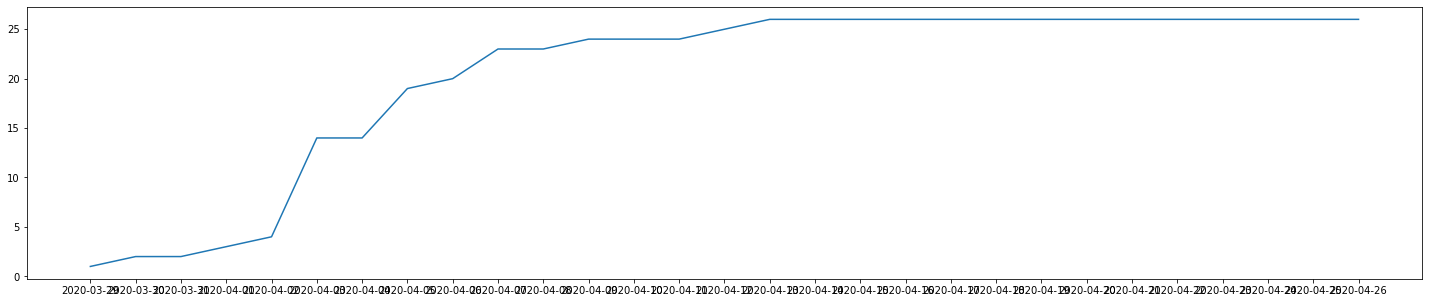

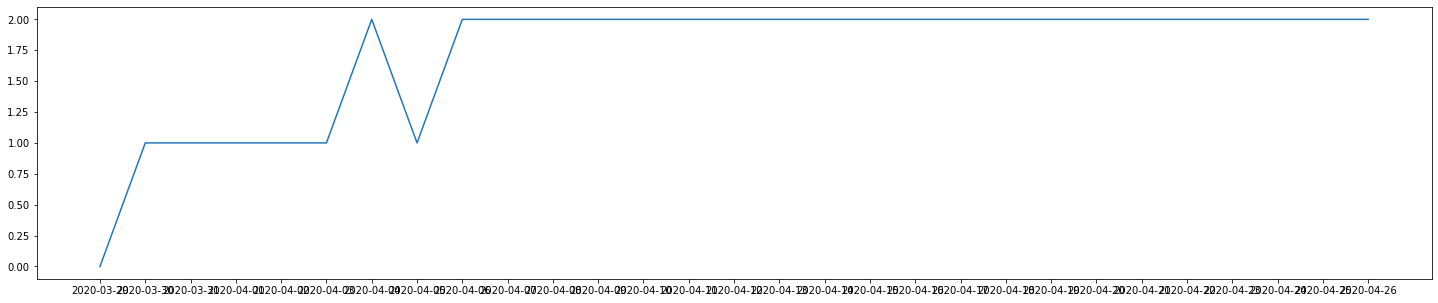

In [6]:
plt.figure(figsize=(25, 5))
plt.plot(df_confirmed['date'], df_confirmed['confirmed'])
plt.show()

plt.figure(figsize=(25, 5))
plt.plot(df_deaths['date'], df_deaths['deaths'])
plt.show()

In [7]:
def plot(a, b, situation, city):
    plt.figure(figsize=(25, 5))
    plt.title('Gráfico de {} para {}'.format(situation, city))
    plt.plot(a, b)
    plt.show()

def analisar_cidade_situacao(city: str, situacao: str):
    """
        Análise situação por cidade
    """

    state = 'RS'

    df_cities = df.loc[ df['state'] == state ]
    df_cities = df_cities.loc[ df_cities['city'] == city ]

    df_situation = df_cities.sort_values(by='date')
    df_situation = df_situation[['date', situacao]]
        
    plot(df_situation['date'], df_situation[situacao], situacao, city)
    

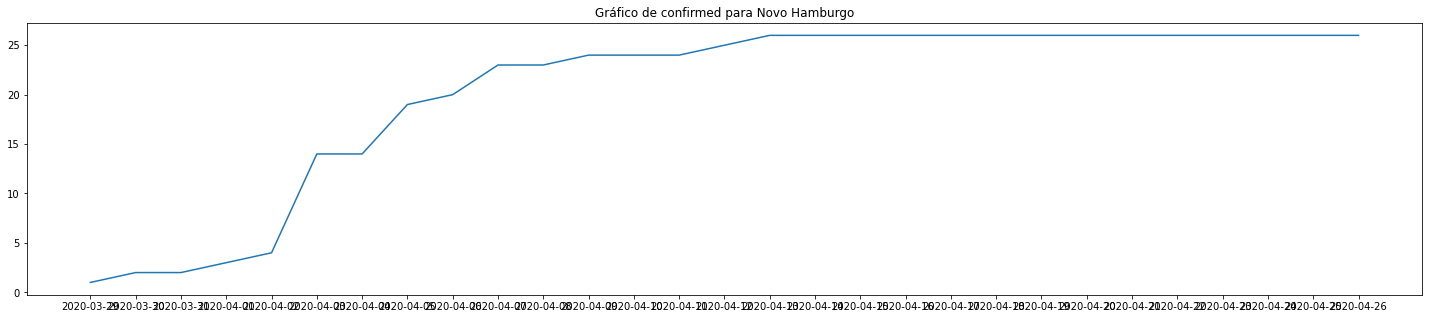

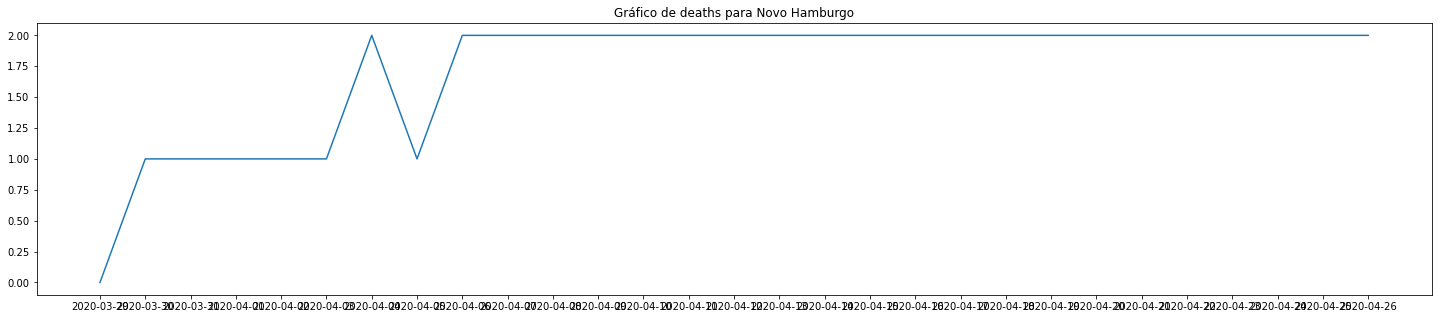

In [8]:
analisar_cidade_situacao("Novo Hamburgo", 'confirmed')
analisar_cidade_situacao("Novo Hamburgo", 'deaths')

In [9]:
def get_dates():
    return df.date.sort_values().unique()

def comparar_cidades_situacao(cities: list, situation: str):
    """
        Análise de comparação por cidade e situação
    """

    df_compair = pd.DataFrame({'date': get_dates()})

    for city in cities:
        df_cities = df.loc[ df['city'] == city ]

        df_situation = df_cities[['date', situation]]
        df_situation = df_situation.sort_values(by='date')
        df_situation.columns = ['date', city]
        df_compair = pd.merge(df_compair, df_situation, on='date', how='left') 
        
    return df_compair

In [10]:
qwe = comparar_cidades_situacao(['Novo Hamburgo', 'Campo Bom', 'Porto Alegre'], 'confirmed')
qwe

,date,Novo Hamburgo,Campo Bom,Porto Alegre
0,2020-02-25,NaN,NaN,NaN
1,2020-02-26,NaN,NaN,NaN
2,2020-02-27,NaN,NaN,NaN
3,2020-02-28,NaN,NaN,NaN
4,2020-02-29,NaN,NaN,NaN
...,...,...,...,...
57,2020-04-22,26.0,4.0,401.0
58,2020-04-23,26.0,4.0,413.0
59,2020-04-24,26.0,4.0,420.0
60,2020-04-25,26.0,4.0,425.0


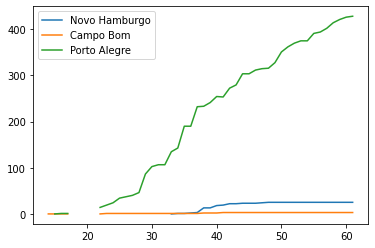

In [11]:
qwe.plot()

## Comparação dos casos confirmados de algumas cidades do vale dos sinos

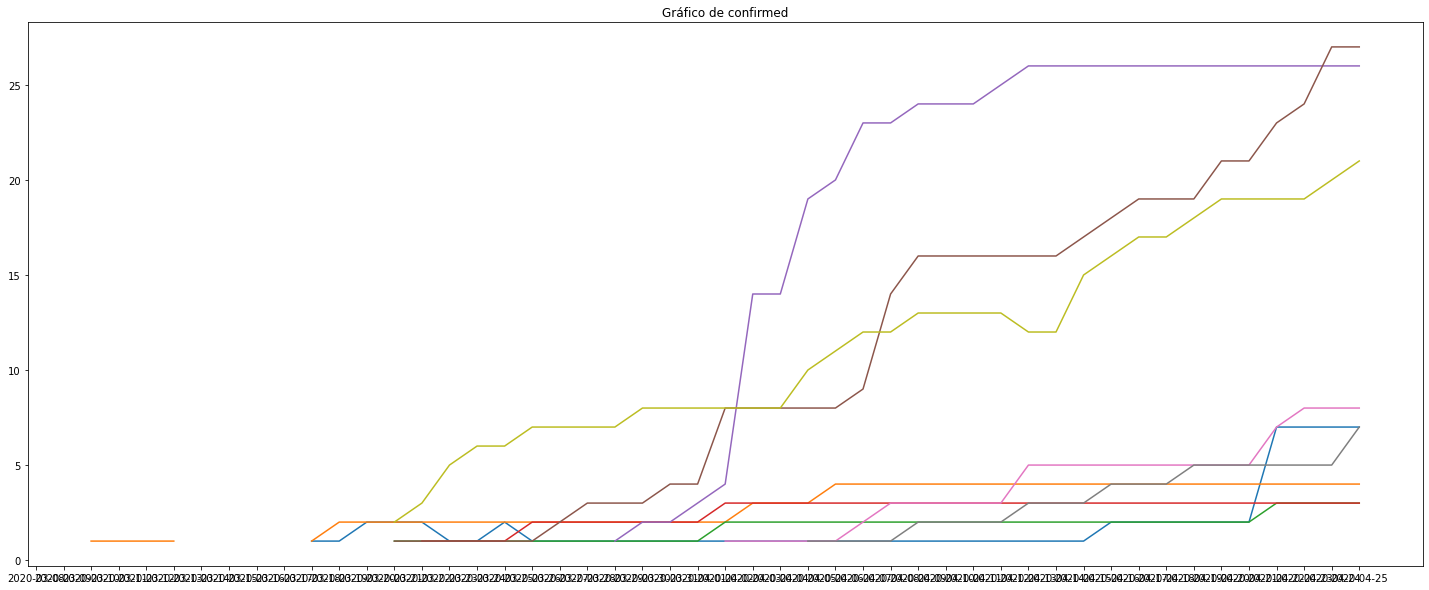

In [13]:
def plot(a, b, situation):
    plt.figure(figsize=(25, 10))
    plt.title('Gráfico de {}'.format(situation))
    plt.plot(a, b)
    plt.show()

df_vale_sinos = ['Sapiranga', 'Campo Bom', 'Dois Irmãos', 'Estância Velha', 'Novo Hamburgo', 'São Leopoldo', 'Sapucaia do Sul', 'Esteio', 'Canoas']

comp_vale_sinos = comparar_cidades_situacao(df_vale_sinos, 'confirmed')
plot(comp_vale_sinos['date'], comp_vale_sinos[df_vale_sinos], 'confirmed')

## Apesar de saber que não se deve comparar as cidades cujo a população não seja equivalente, testarei a adição de Porto Alegre no próximo gráfico

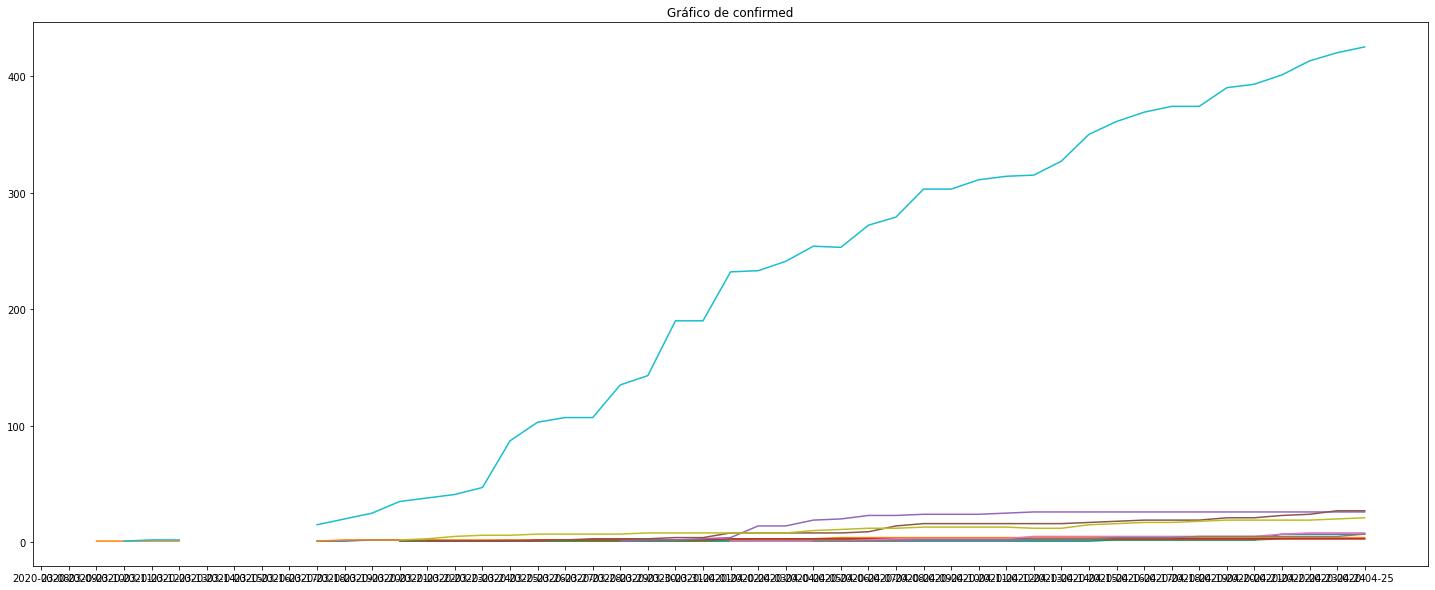

In [14]:
def plot(a, b, situation):
    plt.figure(figsize=(25, 10))
    plt.title('Gráfico de {}'.format(situation))
    plt.plot(a, b)
    plt.show()

df_vale_sinos = ['Sapiranga', 'Campo Bom', 'Dois Irmãos', 'Estância Velha', 'Novo Hamburgo', 'São Leopoldo', 'Sapucaia do Sul', 'Esteio', 'Canoas', 'Porto Alegre']

comp_vale_sinos = comparar_cidades_situacao(df_vale_sinos, 'confirmed')
plot(comp_vale_sinos['date'], comp_vale_sinos[df_vale_sinos], 'confirmed')